100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:22<00:00,  1.30s/it]


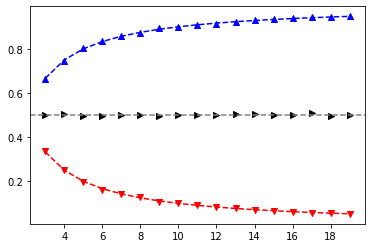

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
    
nLoop = 20000
for nDoors in tqdm( np.arange(3, 20) ):
    score_keeper = 0
    score_switch = 0
    score_newbie = 0
    # M = "OPEN ALL DOORS: LEAVE ONLY THREE, ONE OPEN W/ GOAT"
    M = nDoors - 2
    for _ in range(nLoop):
        iCar    = np.random.randint(0, nDoors)
        iGoats  = np.delete( np.arange(0, nDoors, 1), iCar )
        iKeeper = np.random.randint(0, nDoors)    
        # Open M doors, leave >= 2
        iOpened = np.random.choice( iGoats[iGoats != iKeeper], size=M, replace=False )
        iClosed = np.delete( np.arange(0, nDoors, 1), iOpened )
        if len(iClosed) + len(iOpened) != nDoors: print('NOPE'); break
        #print('1:', iKeep, iCar, iOpened)
        #print('2:', nDoors, len(iOpened))
        #print('3:', iKeep, np.sort(iOpened), np.sort(iClosed))
        
        iSwitch = np.random.choice( iClosed[iClosed != iKeeper] )
        iNewbie = np.random.choice( iClosed )
        
        if iKeeper == iCar: score_keeper += 1
        if iSwitch == iCar: score_switch += 1
        if iNewbie == iCar: score_newbie += 1
        #break         
    plt.scatter(nDoors, score_keeper/nLoop, c='red',   marker='v')
    plt.scatter(nDoors, score_switch/nLoop, c='blue',  marker='^')
    plt.scatter(nDoors, score_newbie/nLoop, c='black', marker='>')

n = np.arange(3, 20, 1)
plt.plot(n, 1/n, c='red', ls='--')
plt.axhline(0.5, c='gray', ls='--')
plt.plot(n, 1-1/n, c='blue', ls='--')

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  3.08it/s]
<ipython-input-7-4863bf07d9f2>:32: RuntimeWarning: divide by zero encountered in divide
  plt.plot(n, 1-(n-1)/n/(n-1-m), c='blue', ls='--')


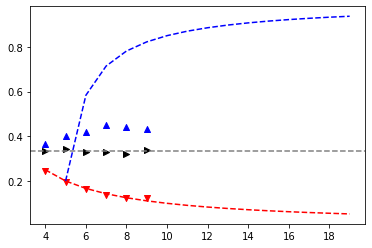

In [7]:
nLoop = 5000
for nDoors in tqdm( np.arange(4, 10, 1) ):
    score_keeper = 0
    score_switch = 0
    score_newbie = 0
    # "OPEN DOORS: LEAVE ONLY nDoors - M CLOSED
    M = nDoors - 2 - 1
    # print('N', nDoors); print('Opened', M); print('Closed', nDoors - M)
    for _ in range(nLoop):
        iCar    = np.random.randint(0, nDoors)
        iGoats  = np.delete( np.arange(0, nDoors, 1), iCar )
        iKeeper = np.random.randint(0, nDoors)    
        iOpened = np.random.choice( iGoats[iGoats != iKeeper], size=M, replace=False )
        iClosed = np.delete( np.arange(0, nDoors, 1), iOpened )
        if len(iClosed) + len(iOpened) != nDoors: print('NOPE'); break
        
        iSwitch = np.random.choice( iClosed[iClosed != iKeeper] )
        iNewbie = np.random.choice( iClosed )
        
        if iKeeper == iCar: score_keeper += 1
        if iSwitch == iCar: score_switch += 1
        if iNewbie == iCar: score_newbie += 1
        #break         
    plt.scatter(nDoors, score_keeper/nLoop, c='red',   marker='v')
    plt.scatter(nDoors, score_switch/nLoop, c='blue',  marker='^')
    plt.scatter(nDoors, score_newbie/nLoop, c='black', marker='>')

n = np.arange(4, 20, 1)
m = 3
plt.plot(n, 1/n, c='red', ls='--')
plt.axhline(1/len(iClosed), c='gray', ls='--')
plt.plot(n, 1-(n-1)/n/(n-1-m), c='blue', ls='--')